<a href="https://colab.research.google.com/github/Muthu2312/The_Sparks_Foundation/blob/main/Task_7_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author: Mutharasan

##Task 4 : Stock Market Prediction using Numerical and Textual Analysis

###GRIP @ The Sparks Foundation

Requried LIbaries

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 16.0 MB/s 
     |████████████████████████████████| 9.8 MB 42.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from statsmodels.tsa.stattools import adfuller
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import nltk
import re
from pmdarima import auto_arima
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
columns=['Date','Category','News']
df = pd.read_csv("/content/drive/MyDrive/The Sparks Foundation/Task 7_Stock Market Prediction/india-news-headlines.csv",names=columns)

In [ ]:
df.head()

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
df.drop('Category', axis = 1, inplace=True)
df.drop([0],axis=0,inplace=True)
print('Showing part of the whole dataset:')
df.head()

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic


In [ ]:
hisdf = pd.read_csv("/content/drive/MyDrive/The Sparks Foundation/Task 7_Stock Market Prediction/HistoricalPrices.csv")
hisdf.head()

,Date,Open,High,Low,Close
0,04/13/22,58910.74,59003.82,58291.23,58338.93
1,04/12/22,58743.50,58794.78,58298.57,58576.37
2,04/11/22,59333.18,59355.76,58894.40,58964.57
3,04/08/22,59256.97,59654.44,58876.36,59447.18
4,04/07/22,59402.61,59504.92,58977.35,59034.95


In [ ]:
hisdf.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [ ]:
df["Date"] = pd.to_datetime(df["Date"],format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 78.4+ MB


In [ ]:
hisdf["Date"].replace("/","",inplace=True)

Text(0, 0.5, 'BSESN')

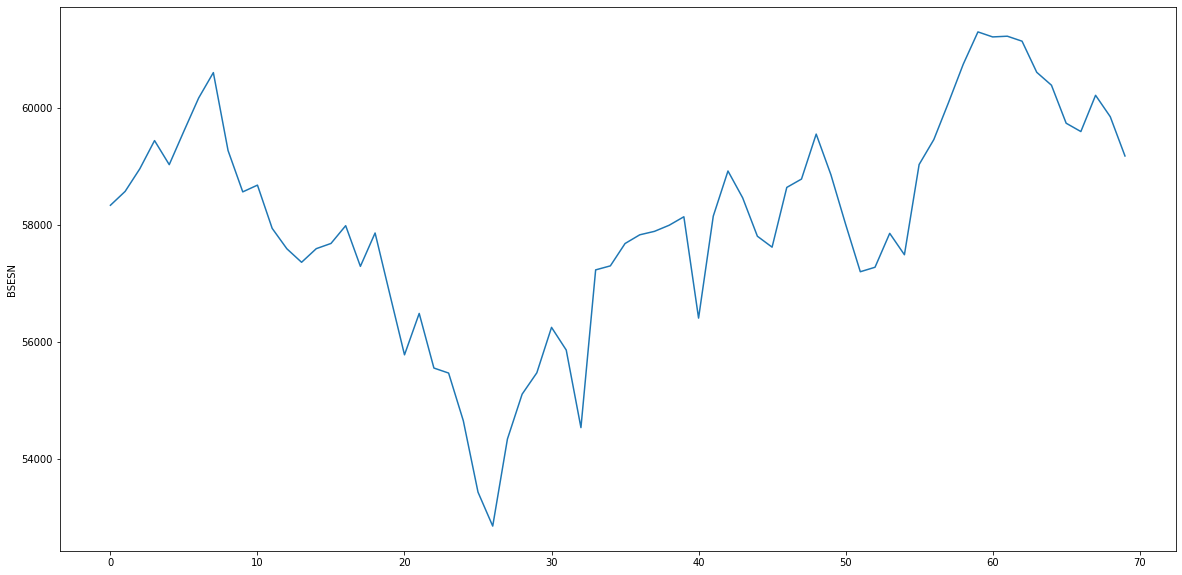

In [ ]:
plt.figure(figsize=(20,10))
hisdf[' Close'].plot()
plt.ylabel('BSESN')

In [ ]:
# Remove Unwanted Characters from the News

In [ ]:
#removing unwanted characters from the News
df.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df["News"].head(5)

1    Status quo will not be disturbed at Ayodhya  s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India 
4                   For bigwigs  it is destination Goa
5                 Extra buses to clear tourist traffic
Name: News, dtype: object

In [ ]:
# Historical Analysis

In [ ]:
# Plot the Moving Average

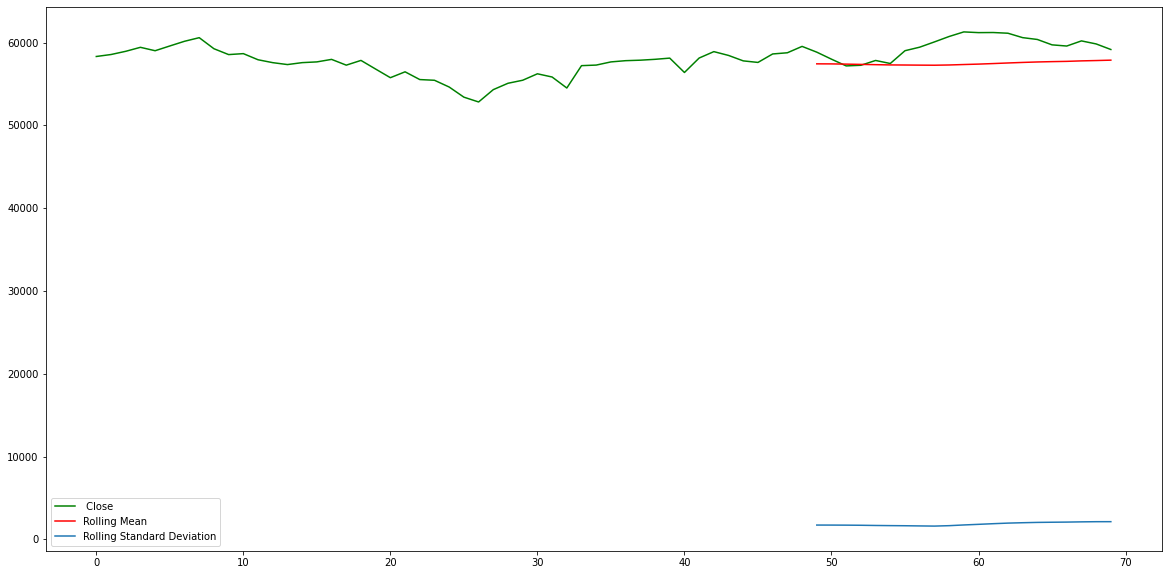

In [ ]:
#Plotting moving average
close = hisdf[' Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
hisdf[' Close'].plot(color='g',label=' Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

In [ ]:
# plot the return

Text(0.5, 1.0, 'Returns')

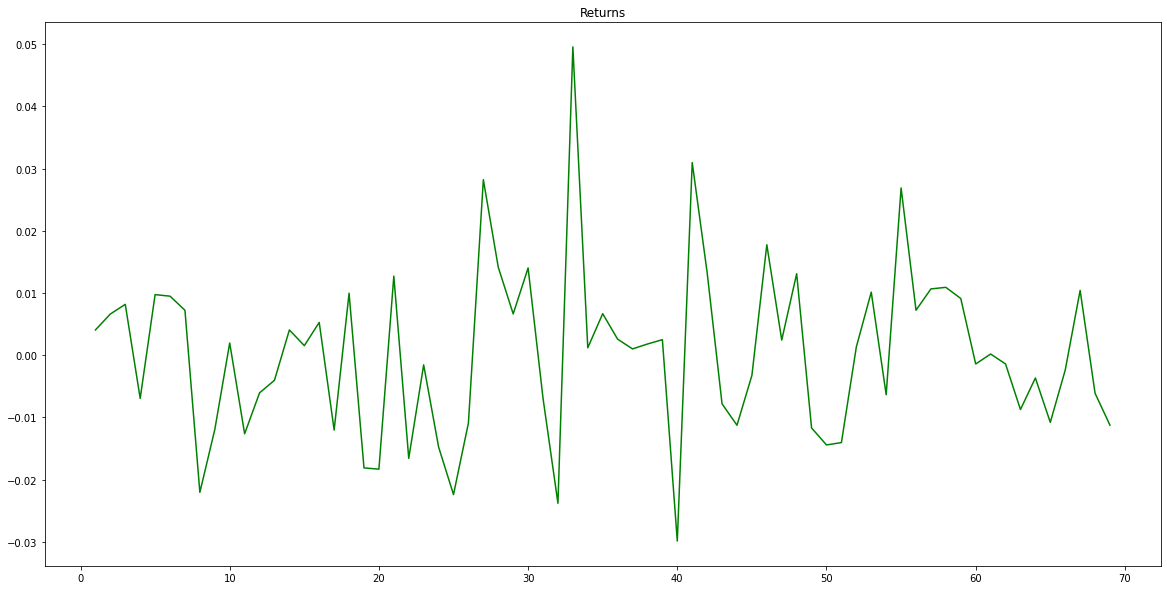

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [ ]:
# Train test split
train = hisdf[:1219]
test = hisdf[1219:]

In [ ]:
# Rolling mean and Standard Deviation

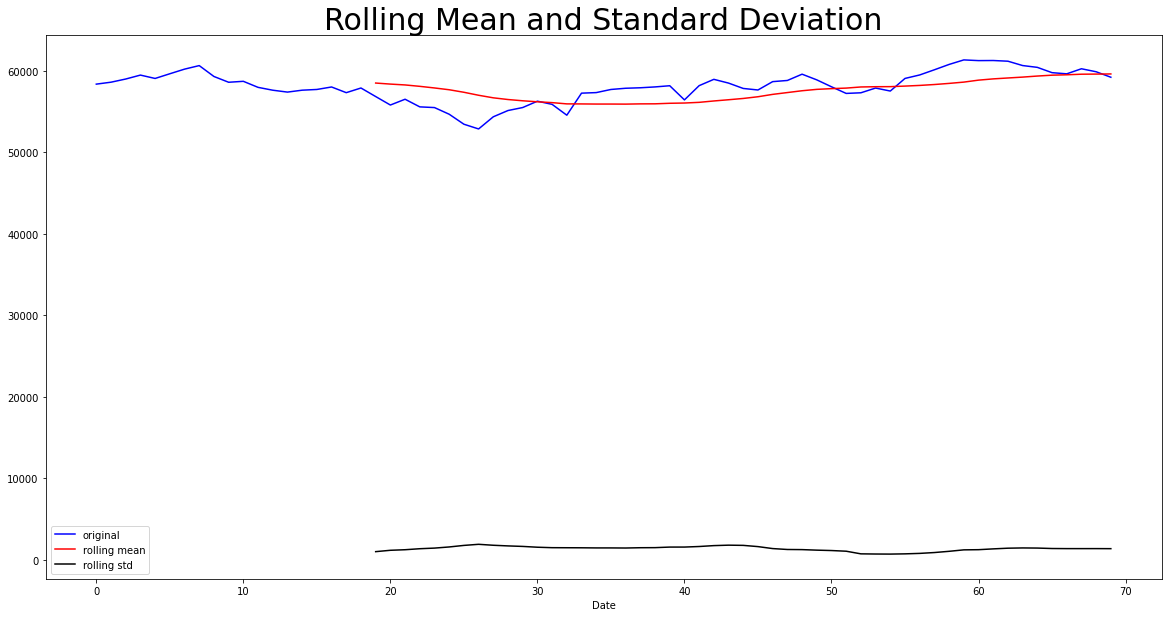

Results of dickey fuller test
ADF Test Statistic : -1.6672544514923833
p-value : 0.4480579972297018
#Lags Used : 0
Number of Observations Used : 69
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
#Stationarity test
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train[' Close'])

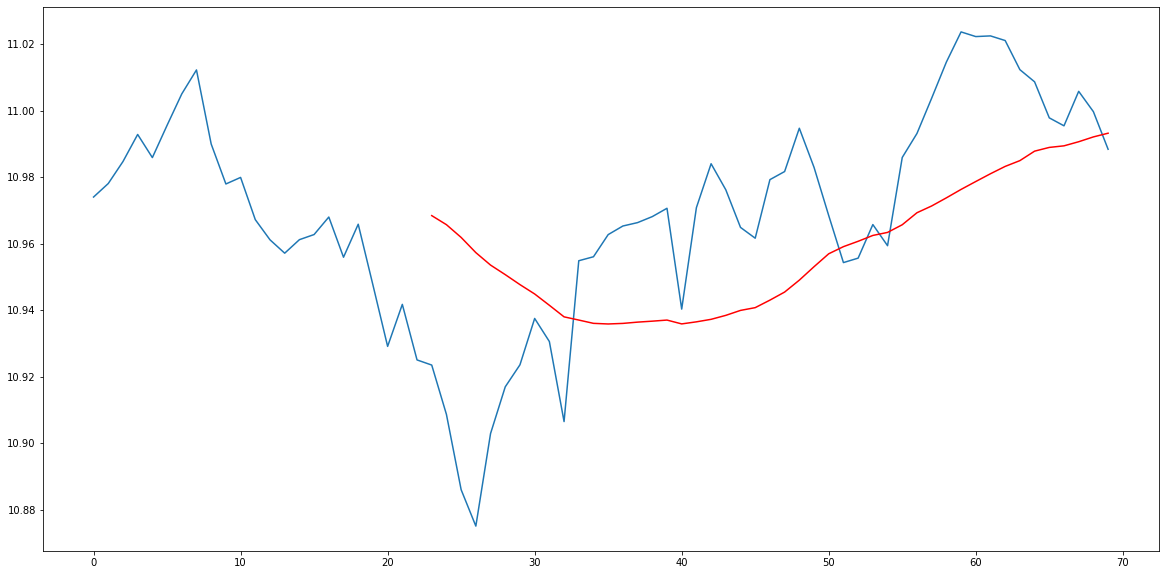

In [ ]:
train_log = np.log(train[' Close']) 
test_log = np.log(test[' Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

In [ ]:
train_log

0     10.974025
1     10.978087
2     10.984692
3     10.992843
4     10.985885
        ...    
65    10.997835
66    10.995442
67    11.005812
68    10.999696
69    10.988393
Name:  Close, Length: 70, dtype: float64

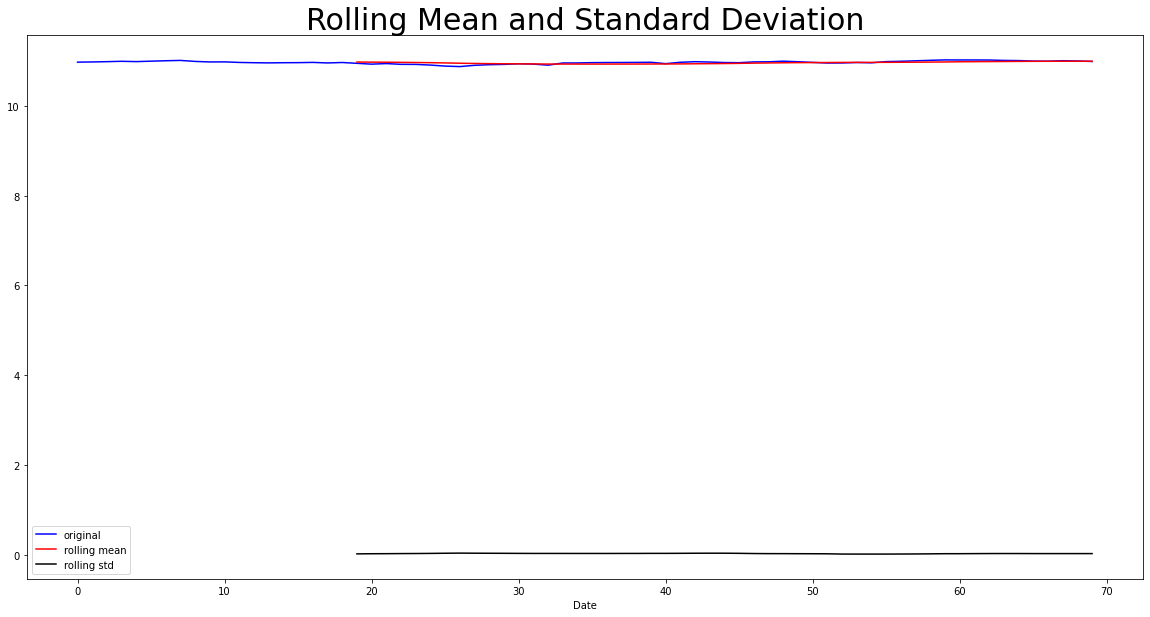

Results of dickey fuller test
ADF Test Statistic : -1.6841968709272128
p-value : 0.4392725648808741
#Lags Used : 0
Number of Observations Used : 69
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

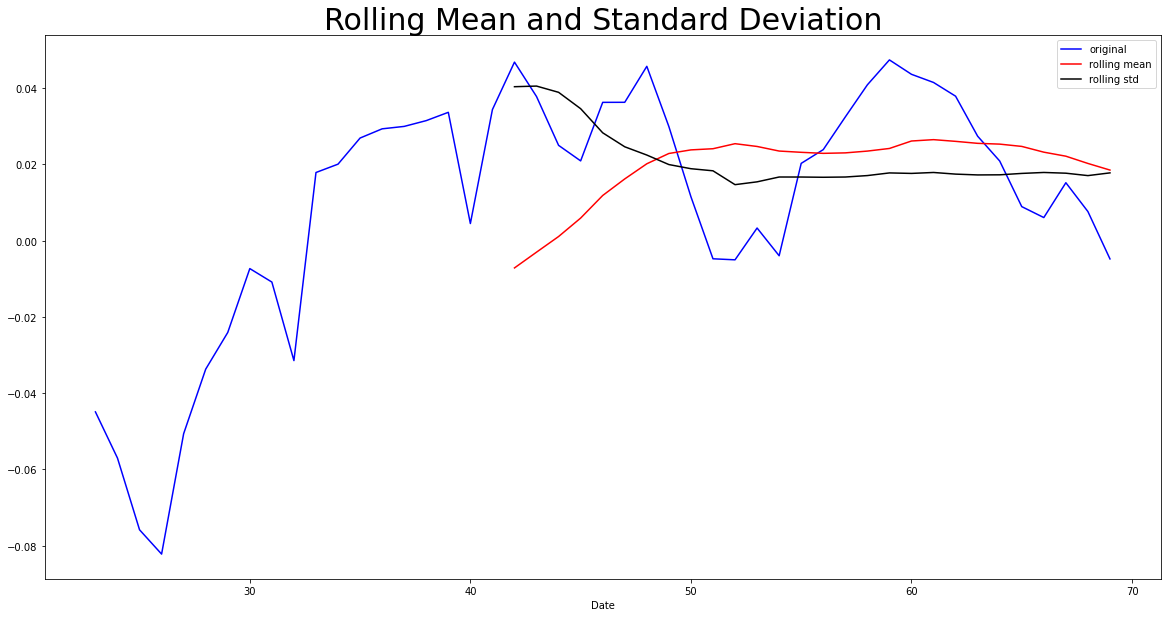

Results of dickey fuller test
ADF Test Statistic : -2.0270255496650424
p-value : 0.27485047424130493
#Lags Used : 0
Number of Observations Used : 46
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [ ]:
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(periods = len(test))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-386.633, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-393.466, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-391.508, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-391.512, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-395.449, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-389.500, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.796 seconds


In [ ]:
predictions=pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Text(0, 0.5, 'Actual Stock Price')

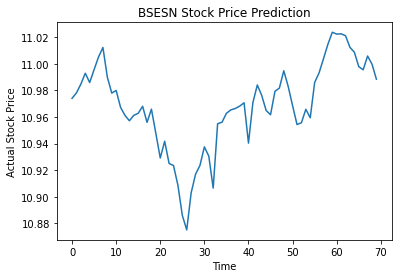

In [ ]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

#Textual Analysis

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['News'].apply(getSubjectivity)
df['Polarity'] = df['News'].apply(getPolarity)
df

,Date,News,Subjectivity,Polarity
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000
3,2001-01-02,America's unwanted heading for India,0.000000,0.000000
4,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000
5,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000
...,...,...,...,...
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424065,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424066,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['Compound'] = [sia.polarity_scores(v)['compound'] for v in df['News']]
df['Negative'] = [sia.polarity_scores(v)['neg'] for v in df['News']]
df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df['News']]
df['Positive'] = [sia.polarity_scores(v)['pos'] for v in df['News']]
df

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,America's unwanted heading for India,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000
5,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000,0.3818,0.000,0.658,0.342
...,...,...,...,...,...,...,...,...
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.2023,0.000,0.859,0.141
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.2023,0.000,0.859,0.141
3424065,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.2023,0.000,0.859,0.141
3424066,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.1280,0.000,0.842,0.158


#Merge the Historical and Textual Data

In [ ]:
df["Close"]=hisdf[" Close"]

In [ ]:
df.head()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Close
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.00,0.2924,0.000,0.805,0.195,58576.37
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000,58964.57
3,2001-01-02,America's unwanted heading for India,0.000000,0.00,-0.2263,0.322,0.678,0.000,59447.18
4,2001-01-02,For bigwigs it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000,59034.95
5,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342,59610.41


In [ ]:
hisdf.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

#Create Dataset for Model Training

In [ ]:
dfmerge1 = df[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1.dropna(inplace=True)

#Normalize Data

In [ ]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1,0.677240,0.000000,0.166667,0.763944,0.000000,0.714495,0.345133
2,0.723093,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
3,0.780097,0.000000,0.166667,0.408524,0.471449,0.528551,0.000000
4,0.731406,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
5,0.799378,0.268519,0.208333,0.825202,0.000000,0.499268,0.605310


In [ ]:
X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1,0.000000,0.166667,0.763944,0.000000,0.714495,0.345133
2,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
3,0.000000,0.166667,0.408524,0.471449,0.528551,0.000000
4,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
5,0.268519,0.208333,0.825202,0.000000,0.499268,0.605310
...,...,...,...,...,...,...
65,0.000000,0.166667,0.274770,0.379209,0.620791,0.000000
66,0.000000,0.000000,0.083733,0.866764,0.133236,0.000000
67,0.555556,0.583333,0.563588,0.000000,1.000000,0.000000
68,0.555556,0.583333,0.563588,0.000000,1.000000,0.000000


In [ ]:
Y=df['Close']
Y

1     0.677240
2     0.723093
3     0.780097
4     0.731406
5     0.799378
        ...   
65    0.815234
66    0.798365
67    0.871753
68    0.828378
69    0.748919
Name: Close, Length: 69, dtype: float64

#Split the Dataset into Train & Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)


In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
23,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
53,1.000000,0.833333,0.563588,0.000000,1.000000,0.000000
61,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
43,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
5,0.268519,0.208333,0.825202,0.000000,0.499268,0.605310
27,0.000000,0.166667,0.763944,0.000000,0.714495,0.345133
29,0.000000,0.166667,0.408524,0.471449,0.528551,0.000000
3,0.000000,0.166667,0.408524,0.471449,0.528551,0.000000
55,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000
12,0.000000,0.166667,0.563588,0.000000,1.000000,0.000000


#RandomForestRegressor Model

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

[0.57069103 0.71363239 0.55955291 0.55008789 0.55955291 0.63572435
 0.55955291 0.74084621 0.55008789 0.63586346]
64    0.892126
35    0.571787
58    0.934557
67    0.871753
50    0.610834
44    0.586550
8     0.759960
63    0.918260
68    0.828378
42    0.718541
Name: Close, dtype: float64
Mean Squared error:  0.061955068296165275


#DecisionTreeRegressor Model

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

[0.59308825 0.67631134 0.55821945 0.51690141 0.55821945 0.59308825
 0.55821945 0.74891923 0.51690141 0.60789661]
64    0.892126
35    0.571787
58    0.934557
67    0.871753
50    0.610834
44    0.586550
8     0.759960
63    0.918260
68    0.828378
42    0.718541
Name: Close, dtype: float64
Mean Squared error:  0.06860156133961774


#AdaBoostRegressor Model

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.053836046721153004


#LGBMRegressor Model

In [ ]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor()

In [ ]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.05671054100124521


#XGBRegressor Model

In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[05:05:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.07273474656078126


#Conclusion

RandomForest = 0.061955068296165275


DecisionTree = 0.06860156133961774


AdaBoost = 0.053836046721153004


LightGBM = 0.05671054100124521


XGBoost = 0.07273474656078126

From here we can see that AdaBoostRegressor shows a better performance than the others

                                                                      Thank You!